In [18]:
#Необходимые библиотеки
import csv
import random
from datetime import datetime
from tkinter import *
from tkinter import ttk
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk) 
import matplotlib.pyplot as plt

In [19]:
#Класс для хранения информации
class Products:
    def __init__(self, information_string=''):
        data = self.informationFormat(information_string)
        if data:
            self.correctness = True
            self.orderNumber = data[0]
            self.orderDate = data[1]
            self.itemName = data[2]
            self.itemCategory = data[3]
            self.salesNumber = data[4]
            self.itemPrice = data[5]
            self.totalCost = data[6]
        else:
            self.correctness = False
            self.orderNumber = 0
            self.orderDate = datetime.today()
            self.itemName = ''
            self.itemCategory = ''
            self.salesNumber = 0
            self.itemPrice = 0
            self.totalCost = 0

    def informationFormat(self, information_string):
        information_list = information_string.split(';')
        formatted_data = []

        if len(information_list) != 7:
            return False
        #NumberOfOrder
        if not information_list[0].isdigit():
            return False
        else:
            formatted_data.append(int(information_list[0]))
        #DateOfOrder
        try:
            formatted_data.append(datetime.strptime(information_list[1], '%Y-%m-%d'))
        except ValueError:
            return False
        #NameofProduct
        formatted_data.append(information_list[2])
        #ProductCategory
        formatted_data.append(information_list[3])
        #numberofsale
        try:
            formatted_data.append(int(information_list[4]))
        except ValueError:
            return False
        #Priceperproduct
        try:
            formatted_data.append(float(information_list[5]))
        except ValueError:
            return False
        #ItogPrice
        try:
            formatted_data.append(float(information_list[6]))
        except ValueError:
            return False
            
        return formatted_data


In [20]:
#Ввод товаров из файла
goods_list = []
goods_dictionary = {}
goods_amount = {}

flag = False
with open('List_of_Goods.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        item = Products(row[0])
        if item.correctness:
            goods_list.append(item)
            if item.itemName in goods_dictionary:
                goods_dictionary[item.itemName].append(item)
                goods_amount[item.itemName] += item.salesNumber
            else:
                goods_dictionary[item.itemName] = [item]
                goods_amount[item.itemName] = item.salesNumber
        else:
            print('Не верный формат данных!')

Не верный формат данных!


In [21]:
#Поиск самого ходового товара
def mostPopularGood(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.itemName in current_dictionary:
                current_dictionary[item.itemName] += item.salesNumber
            else:
                current_dictionary[item.itemName] = item.salesNumber
    max_number = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_number:
            max_number = current_dictionary[i]
            max_name = i
    return (max_name, max_number)

In [22]:
#Поиск самого прибыльного товара
def mostProfitableProduct(dictionary):
    current_dictionary = {}
    for i in dictionary:
        for item in dictionary[i]:
            if item.itemName in current_dictionary:
                current_dictionary[item.itemName] += item.totalCost
            else:
                current_dictionary[item.itemName] = item.totalCost
    max_cost = 0
    max_name = ''
    for i in current_dictionary:
        if current_dictionary[i] > max_cost:
            max_cost = current_dictionary[i]
            max_name = i
    return (max_name, max_cost)

In [23]:
#Суммарная прибыть
def TotalProfit():
    total_profit = 0
    for i in goods_list:
        total_profit += i.totalCost
    return total_profit

(-1.25, 1.25, -1.25, 1.25)

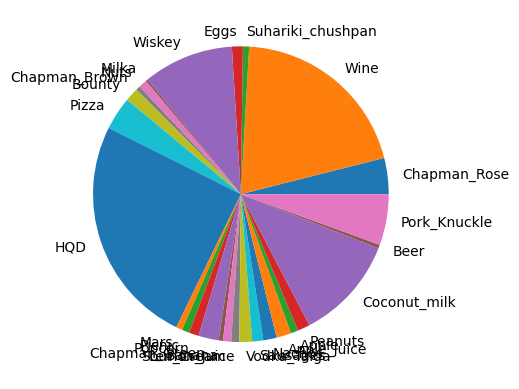

In [24]:
#Доля каждого товара в общей выручке
values = []
labels = []
total_income = TotalProfit()
for i in goods_amount:
    labels.append(i)
    val = goods_amount[i] * goods_dictionary[i][0].itemPrice
    values.append(val / total_income * 100)
fig, ax = plt.subplots()
ax.pie(values, labels=labels)
ax.axis()

In [25]:
#Быстрая сортировка
def quickSort(nums):
   if len(nums) <= 1:
       return nums
   else:
       q = random.choice(nums)
       s_nums = []
       m_nums = []
       e_nums = []
       for n in nums:
           if n[0] < q[0]:
               s_nums.append(n)
           elif n[0] > q[0]:
               m_nums.append(n)
           else:
               e_nums.append(n)
       return quickSort(s_nums) + e_nums + quickSort(m_nums)

sorted_goods = []

for i in goods_amount:
    sorted_goods.append((goods_amount[i], i))
print(sorted_goods)
sorted_goods = quickSort(sorted_goods)
print(sorted_goods)

[(2960, 'Chapman_Rose'), (2483, 'Wine'), (2593, 'Suhariki_chushpan'), (1581, 'Eggs'), (742, 'Wiskey'), (528, 'Milka'), (2284, 'Nuts'), (351, 'Chapman_Brown'), (4687, 'Bounty'), (2308, 'Pizza'), (2898, 'HQD'), (1304, 'Mars'), (1791, 'Picnic'), (2522, 'Popcorn'), (1657, 'Chapman_Green'), (614, 'Banana'), (1726, 'Sour_Cream'), (2191, 'Lemon_Juice'), (2004, 'Vodka_Taiga'), (814, 'Sausages'), (1697, 'Nachos'), (2301, 'Apple_Juice'), (1563, 'Apple'), (2403, 'Peanuts'), (2065, 'Coconut_milk'), (732, 'Beer'), (1478, 'Pork_Knuckle')]
[(351, 'Chapman_Brown'), (528, 'Milka'), (614, 'Banana'), (732, 'Beer'), (742, 'Wiskey'), (814, 'Sausages'), (1304, 'Mars'), (1478, 'Pork_Knuckle'), (1563, 'Apple'), (1581, 'Eggs'), (1657, 'Chapman_Green'), (1697, 'Nachos'), (1726, 'Sour_Cream'), (1791, 'Picnic'), (2004, 'Vodka_Taiga'), (2065, 'Coconut_milk'), (2191, 'Lemon_Juice'), (2284, 'Nuts'), (2301, 'Apple_Juice'), (2308, 'Pizza'), (2403, 'Peanuts'), (2483, 'Wine'), (2522, 'Popcorn'), (2593, 'Suhariki_chushpa

In [26]:
#Сортировка вставками
def insertionSort(nums):
    for i in range(1, len(nums)):
        key = nums[i]
        j = i-1
        while j >= 0 and key[0] < nums[j][0]:
            nums[j + 1] = nums[j]
            j -= 1
        nums[j + 1] = key
    return nums

sorted_goods = []

for i in goods_amount:
    sorted_goods.append((goods_amount[i], i))
print(sorted_goods)
sorted_goods = insertionSort(sorted_goods)
print(sorted_goods)


[(2960, 'Chapman_Rose'), (2483, 'Wine'), (2593, 'Suhariki_chushpan'), (1581, 'Eggs'), (742, 'Wiskey'), (528, 'Milka'), (2284, 'Nuts'), (351, 'Chapman_Brown'), (4687, 'Bounty'), (2308, 'Pizza'), (2898, 'HQD'), (1304, 'Mars'), (1791, 'Picnic'), (2522, 'Popcorn'), (1657, 'Chapman_Green'), (614, 'Banana'), (1726, 'Sour_Cream'), (2191, 'Lemon_Juice'), (2004, 'Vodka_Taiga'), (814, 'Sausages'), (1697, 'Nachos'), (2301, 'Apple_Juice'), (1563, 'Apple'), (2403, 'Peanuts'), (2065, 'Coconut_milk'), (732, 'Beer'), (1478, 'Pork_Knuckle')]
[(351, 'Chapman_Brown'), (528, 'Milka'), (614, 'Banana'), (732, 'Beer'), (742, 'Wiskey'), (814, 'Sausages'), (1304, 'Mars'), (1478, 'Pork_Knuckle'), (1563, 'Apple'), (1581, 'Eggs'), (1657, 'Chapman_Green'), (1697, 'Nachos'), (1726, 'Sour_Cream'), (1791, 'Picnic'), (2004, 'Vodka_Taiga'), (2065, 'Coconut_milk'), (2191, 'Lemon_Juice'), (2284, 'Nuts'), (2301, 'Apple_Juice'), (2308, 'Pizza'), (2403, 'Peanuts'), (2483, 'Wine'), (2522, 'Popcorn'), (2593, 'Suhariki_chushpa

In [27]:
#Cортировка Шелла
def shellSort(nums):
    n = len(nums)
    gap = n // 2
    while gap > 0:
        for i in range(gap, n):
            temp = nums[i]
            j = i
            while j >= gap and nums[j - gap] > temp:
                nums[j] = nums[j - gap]
                j -= gap
            nums[j] = temp
        gap //= 2
    return nums

sorted_goods = []

for i in goods_amount:
    sorted_goods.append((goods_amount[i], i))

sorted_goods = shellSort(sorted_goods)
print(sorted_goods)


[(351, 'Chapman_Brown'), (528, 'Milka'), (614, 'Banana'), (732, 'Beer'), (742, 'Wiskey'), (814, 'Sausages'), (1304, 'Mars'), (1478, 'Pork_Knuckle'), (1563, 'Apple'), (1581, 'Eggs'), (1657, 'Chapman_Green'), (1697, 'Nachos'), (1726, 'Sour_Cream'), (1791, 'Picnic'), (2004, 'Vodka_Taiga'), (2065, 'Coconut_milk'), (2191, 'Lemon_Juice'), (2284, 'Nuts'), (2301, 'Apple_Juice'), (2308, 'Pizza'), (2403, 'Peanuts'), (2483, 'Wine'), (2522, 'Popcorn'), (2593, 'Suhariki_chushpan'), (2898, 'HQD'), (2960, 'Chapman_Rose'), (4687, 'Bounty')]


In [29]:
#Вывод данных в консоль
if len(goods_list):
    print("Итоговая выручка", TotalProfit())
    print("Самый популярный  товар", mostPopularGood(goods_dictionary))
    print("Самый прибыльный товар",mostProfitableProduct(goods_dictionary))
    for i in goods_amount:
        print(i, "был продан", goods_amount[i], "раз")

Итоговая выручка 17244199.0
Самый популярный  товар ('Bounty', 4687)
Самый прибыльный товар ('HQD', 4347000.0)
Chapman_Rose был продан 2960 раз
Wine был продан 2483 раз
Suhariki_chushpan был продан 2593 раз
Eggs был продан 1581 раз
Wiskey был продан 742 раз
Milka был продан 528 раз
Nuts был продан 2284 раз
Chapman_Brown был продан 351 раз
Bounty был продан 4687 раз
Pizza был продан 2308 раз
HQD был продан 2898 раз
Mars был продан 1304 раз
Picnic был продан 1791 раз
Popcorn был продан 2522 раз
Chapman_Green был продан 1657 раз
Banana был продан 614 раз
Sour_Cream был продан 1726 раз
Lemon_Juice был продан 2191 раз
Vodka_Taiga был продан 2004 раз
Sausages был продан 814 раз
Nachos был продан 1697 раз
Apple_Juice был продан 2301 раз
Apple был продан 1563 раз
Peanuts был продан 2403 раз
Coconut_milk был продан 2065 раз
Beer был продан 732 раз
Pork_Knuckle был продан 1478 раз


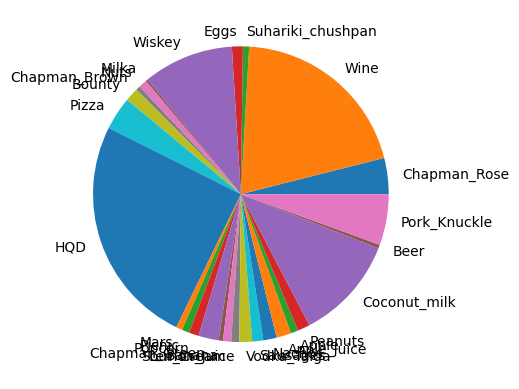

In [33]:
#Документация tkinter
#'https://docs.python.org/3/library/tkinter.html'
#'https://metanit.com/python/tkinter/'

rootWindow = Tk()
rootWindow.title('Курсовая работа')
rootWindow.geometry("300x250+600+450")
rootWindow.resizable(False, False)



#info part
def infoButtonClick():
    informationWindow = Toplevel(rootWindow)
    informationWindow.title('Приветствую!')
    informationWindow.geometry("270x170+600+450")
    label1 = ttk.Label(informationWindow, text="Курсовая работа по дисциплине СИаОИД")
    label2 = ttk.Label(informationWindow, text="Выполнил\nМельников Лев Дмитриевич\nгруппа БФИ2204")
    label1.pack()
    label2.pack()

info_button = ttk.Button(text="info", width = 0, command=infoButtonClick)
info_button.grid(row=10, column=0, padx=4, pady=4)

#общая выручка
def totalIncomeButtonClick():
    totalIncomeWindow = Toplevel(rootWindow)
    totalIncomeWindow.title('Итоговая вырчучка')
    totalIncomeWindow.geometry("270x170+600+450")
    label1 = ttk.Label(totalIncomeWindow, text=f"Итоговая выручка составила")
    label2 = ttk.Label(totalIncomeWindow, text=f"{TotalProfit()} рублей")
    label1.pack()
    label2.pack()

total_income_label = ttk.Label(text="Суммарная выручка", width = 0)
total_income_button = ttk.Button(text="show", width = 0, command=totalIncomeButtonClick)
total_income_label.grid(column = 0, row = 1)
total_income_button.grid(column = 1, row = 1)



#Самый продаваемый товар

def theMostPopularGoodButtonClick():
    mostPopularGoodWindow = Toplevel(rootWindow)
    mostPopularGoodWindow.title('Самый популярный товар:')
    mostPopularGoodWindow.geometry("270x170+600+450")
    k = mostPopularGood(goods_dictionary)
    label1 = ttk.Label(mostPopularGoodWindow, text="Самым популярным товаром оказался")
    label2 = ttk.Label(mostPopularGoodWindow, text=f"{k[0]}")
    label3 = ttk.Label(mostPopularGoodWindow, text="Его купили")
    label4 = ttk.Label(mostPopularGoodWindow, text=f"{k[1]} раз")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

most_popular_good_label = ttk.Label(text="Самый популярный товар", width = 0)
most_popular_good_button = ttk.Button(text="show", width = 0, command=theMostPopularGoodButtonClick)
most_popular_good_label.grid(column = 0, row = 2)
most_popular_good_button.grid(column = 1, row = 2)




#Самый прибыльный товар

def profitableProductButtonClick():
    mostProfitableProductWindow = Toplevel(rootWindow)
    mostProfitableProductWindow.title('Самый прибыльный товар')
    mostProfitableProductWindow.geometry("270x170+600+450")
    k = mostProfitableProduct(goods_dictionary)
    label1 = ttk.Label(mostProfitableProductWindow, text="Самым прибыльным товаром оказался")
    label2 = ttk.Label(mostProfitableProductWindow, text=f"{k[0]}")
    label3 = ttk.Label(mostProfitableProductWindow, text="он принес")
    label4 = ttk.Label(mostProfitableProductWindow, text=f"{k[1]} рублей")
    label1.pack()
    label2.pack()
    label3.pack()
    label4.pack()

most_profitable_product_label = ttk.Label(text="Самый прибыльный товар", width = 0)
most_profitable_product_button = ttk.Button(text="show", width = 0, command=profitableProductButtonClick)
most_profitable_product_label.grid(column = 0, row = 3)
most_profitable_product_button.grid(column = 1, row = 3)

#Финальный отчет
def finalReportButtonClick():
    finalReportWindow = Toplevel(rootWindow)
    finalReportWindow.title('Итоговый отчет по продаже товаро')
    
    label1 = ttk.Label(finalReportWindow, text=f"Итоговая выручка составила")
    label2 = ttk.Label(finalReportWindow, text=f"{TotalProfit()} рублей")
    label1.pack()
    label2.pack()
    
    global values
    global labels
    total_income = TotalProfit()
    fig, ax = plt.subplots()
    ax.pie(values, labels=labels)
    canvas = FigureCanvasTkAgg(fig, master = finalReportWindow)   
    canvas.draw() 
    canvas.get_tk_widget().pack()

    listbox = Listbox(finalReportWindow)
    listbox.pack(side=LEFT, fill=BOTH, expand=1)
    for i in sorted_goods:
        listbox.insert(END, (i[1] + " был продан " + str(i[0]) + " раз")) 

    scrollbar = ttk.Scrollbar(finalReportWindow, orient="vertical", command=listbox.yview)
    scrollbar.pack(side=RIGHT, fill=Y)
      
    listbox["yscrollcommand"]=scrollbar.set

final_report_label = ttk.Label(text="Итоговый отчет по продаже товаров", width = 0)
final_report_button = ttk.Button(text="show", width = 0, command=finalReportButtonClick)
final_report_label.grid(column = 0, row = 4)
final_report_button.grid(column = 1, row = 4)
rootWindow.mainloop()